# Rhyming score experiments

This notebook is for rhyming score experiments. HAMR 2016.

In [1]:
import string

import nltk
import numpy

# For plotting outputs, we'll need
import matplotlib.pyplot as plt
# To display the plotted images inside the notebook:
%matplotlib inline
# Plotting the figures at a reasonable size
import matplotlib
matplotlib.rcParams['figure.figsize'] = (30.0, 20.0)

# Dirty, dirty trick
from rhyme import *

In [2]:
cmudict = collections.defaultdict(list)
for word, syl in nltk.corpus.cmudict.entries():
    cmudict[word].append(syl)

In [17]:
# bad_text = 'I see all I know all For i am the the oracle Give me your hand' \
#     ' I see caked blood on concrete Dead bodies on grass' \
#     ' Mothers crying seeing babies lowered caskets'
bad_text = 'this thing does not rhyme even a little it is just normal text no rap'

# good_text = 'Yeah, yeah It\'s the return of the Wild Style fashionist' \
# ' Smashin hits, make it hard to adapt to this Put pizazz and jazz in this, and cash in this' \
# ' Mastered this, flash this and make em clap to this DJ\'s throw on cuts and obey the crowd' \
# ' Just pump the volume up, and play it loud'
good_text = 'take a step back hey really gonna hack a full stack in a day while on crack'

In [18]:
def tokenize(text):
    tokens = nltk.tokenize.wordpunct_tokenize(text.translate(None, string.punctuation).lower())
    return tokens

In [19]:
bad_words = tokenize(bad_text)
good_words = tokenize(good_text)

In [20]:
def pairwise_grid_stats(score_grid, words):
    minimum = score_grid[score_grid != -1.0].min()
    maximum = score_grid.max()
    print('Range: {0} -- {1}'.format(minimum, maximum))

def pairwise_rhyme_visualization(score_grid, words, show=True):

    fig, ax = plt.subplots()
    heatmap = ax.pcolor(score_grid, cmap=plt.cm.Blues)

    ax.set_xlim((0, len(words)))
    ax.set_ylim((0, len(words)))
    
    # put the major ticks at the middle of each cell
    ax.set_xticks(numpy.arange(score_grid.shape[0])+0.5, minor=False)
    ax.set_yticks(numpy.arange(score_grid.shape[1])+0.5, minor=False)

    # want a more natural, table-like display
    ax.invert_yaxis()
    ax.xaxis.tick_top()

    ax.set_xticklabels(words, minor=False)
    ax.set_yticklabels(words, minor=False)

    if show:
        plt.show()



In [21]:
def score_and_visualize_text(words, prondict=cmudict):
    score_grid = rhyme_score_grid(words, prondict=prondict)
    average = aggregate_score(score_grid)
    print('Average: {0:.4f}'.format(average))
    stats = pairwise_grid_stats(score_grid, words)
    pairwise_rhyme_visualization(score_grid, words)

Average: 0.6242
Range: 0.0 -- 1.0


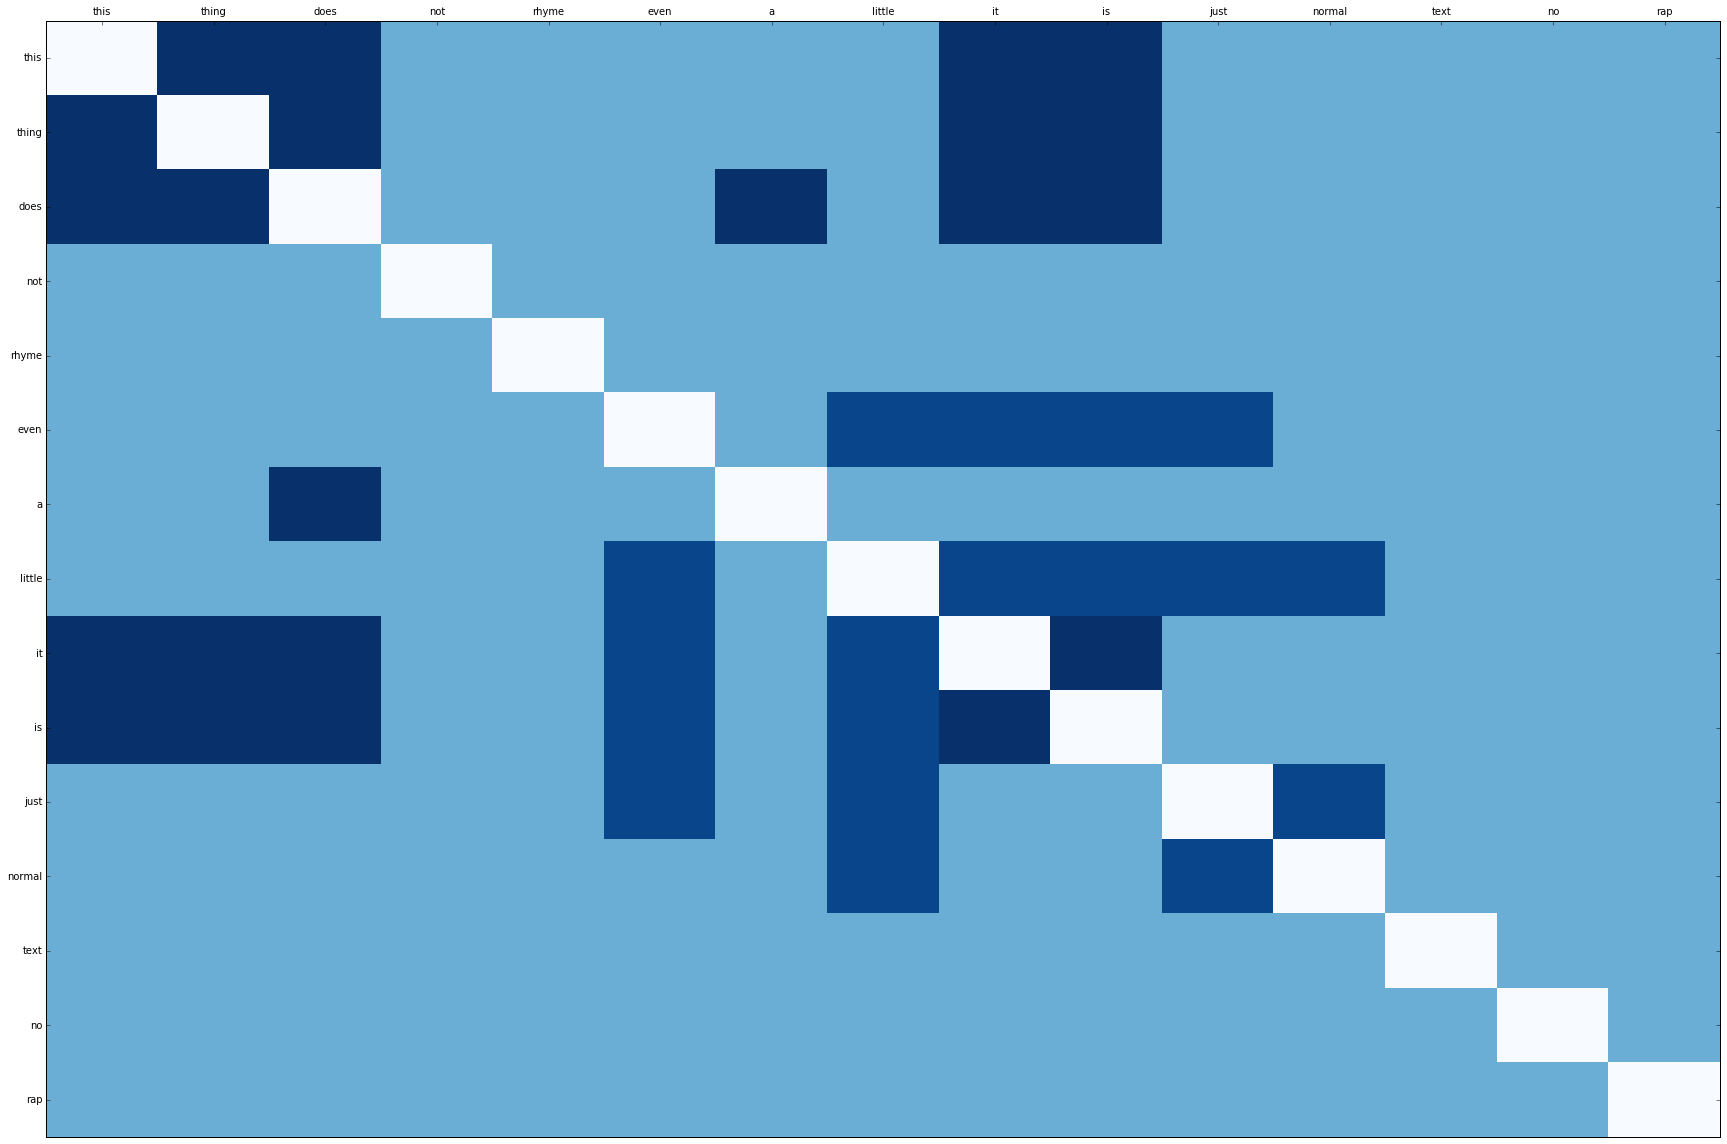

In [22]:
score_and_visualize_text(bad_words)

Average: 0.6096
Range: 0.0 -- 1.0


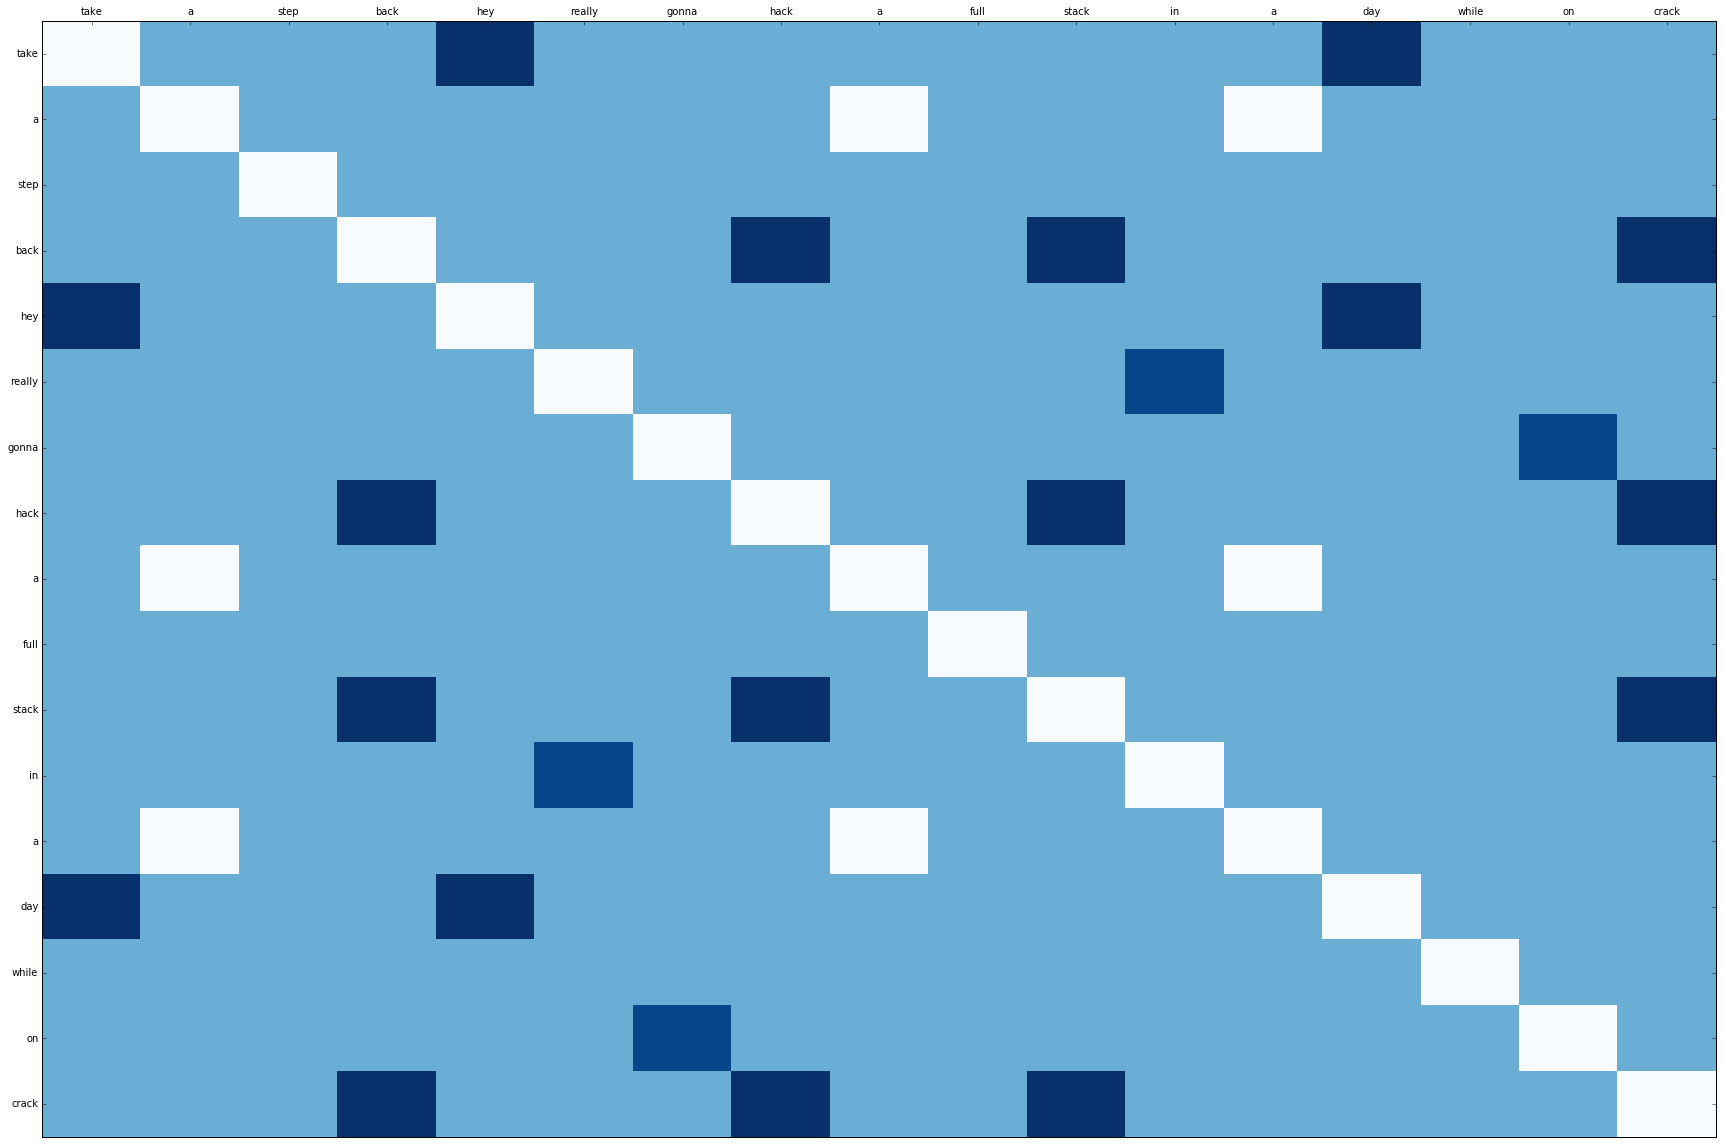

In [23]:
score_and_visualize_text(good_words)

### Assessing the metric: baseline

To get some understanding of how this metric wordks, we need to 


### Ideas on improving

* Do not use common words.
* Only retain nouns, verbs, adjectives and adverbs.
* Word count patterns: 

